<h1>Исследование объявлений о продаже квартир<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-данных" data-toc-modified-id="Открытие-данных-1">Открытие данных<a id="start"></a></a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">Предобработка данных<a id="preprocessing"></a></a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1">Обработка пропущенных значений<a id="null"></a></a></span></li><li><span><a href="#Замена-типов" data-toc-modified-id="Замена-типов-2.2">Замена типов<a id="types"></a></a></span></li></ul></li><li><span><a href="#Расширение-таблицы" data-toc-modified-id="Расширение-таблицы-3">Расширение таблицы<a id="fields"></a></a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Графики-основных-показателей" data-toc-modified-id="Графики-основных-показателей-4.1">Графики основных показателей</a></span></li><li><span><a href="#Время-продажи" data-toc-modified-id="Время-продажи-4.2">Время продажи</a></span></li><li><span><a href="#Проверка-на-выбросы" data-toc-modified-id="Проверка-на-выбросы-4.3">Проверка на выбросы</a></span></li><li><span><a href="#Факторы-ценовой-политики" data-toc-modified-id="Факторы-ценовой-политики-4.4">Факторы ценовой политики</a></span></li><li><span><a href="#Наибольше-объявлений" data-toc-modified-id="Наибольше-объявлений-4.5">Наибольше объявлений</a></span></li><li><span><a href="#Расстояния-от-центра" data-toc-modified-id="Расстояния-от-центра-4.6">Расстояния от центра</a></span></li><li><span><a href="#Квартиры-в-центре" data-toc-modified-id="Квартиры-в-центре-4.7">Квартиры в центре</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5">Вывод</a></span></li></ul></div>

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

# Открытие данных<a id="start"></a>

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


# Предобработка данных<a id="preprocessing"></a>

## Обработка пропущенных значений<a id="null"></a>

In [2]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Дату продажи оставим так, скорее всего это непроданные(?) объекты.

Кол-во этажей скорее всего одноэтажки.

Высота потолков очень спорная, мне кажется здесь надо хотя бы точные адреса домов для расчета.

С площадями лучше, на мой взгляд, не играть.

Медианой или коэфициентами можем легко не угадать планировку дома.

Название нас.пункта мы придумать не сможем, даже наугад опираясь на расстояние к центру.

Парки и водоемы придется оставить пустыми, как и аэропорты, так как даже ссылаясь на местоположение, мы не сможешь получить точное расстояние (даже медианное не подойдет).

In [3]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))
data.dropna(subset=['floors_total','locality_name'], inplace = True)
data = data.reset_index()

In [4]:
del data['airports_nearest']
del data['parks_around3000']
del data['parks_nearest']
del data['ponds_around3000']
del data['ponds_nearest']

In [5]:
data.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
cityCenters_nearest      5501
days_exposition          3171
dtype: int64

In [6]:
data[data['ceiling_height'].isna()]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
11507,11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,20444.0,53.0


И все равно один остался. С адекватной площадью и комнатами. 21км от центра, но за 53 дня. Медиана по комнатам или, наверное, лучше по площади? Но хоть отработало.

In [7]:
data.query('floor == 32')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
11507,11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,20444.0,53.0


Как и ожидалось, она одна такая.

In [8]:
data.query('floors_total == 33')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition
11507,11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,20444.0,53.0


In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna( (data['ceiling_height'] / data['floors_total']).median()*data['floors_total'])

In [10]:
data.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
cityCenters_nearest      5501
days_exposition          3171
dtype: int64

In [11]:
data['balcony'] = data['balcony'].fillna(0) # логическая замена
data['is_apartment'] = data['is_apartment'].fillna(False) # логическая замена

In [13]:
data['living_area'] = data['living_area'].fillna( (data['living_area'] / data['total_area']).median()*data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna((data['kitchen_area'] / data['total_area']).median()*data['total_area'])

In [14]:
data['living_area'].describe()

count    23565.000000
mean        34.577414
std         22.360449
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [15]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.485418
std          6.026880
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [16]:
data.isna().sum()

index                      0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
cityCenters_nearest     5501
days_exposition         3171
dtype: int64

Шансов заполнить количество этажей мне тоже не дали.

## Замена типов<a id="types"></a>

In [18]:
data[['last_price','total_area','balcony']] = data[['last_price','total_area','balcony']].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')

В этих полях дробные значения нам не нужны, а в случае с апартаментами балконами просто сменили тип на более подходящий после замены пропусков. В остальных поменять не сможем просто из-за пропусков.

# Расширение таблицы<a id="fields"></a>

Добавим нужные поля по заданию.

In [19]:
data['square_price'] = data['last_price'] / data['total_area']
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

def floors(data):
    if data['floor'] == 1:
        return 'first'
    elif (data['floor'] == data['floors_total']) & (data['floor'] != 1):
        return 'last'
    else:
        return 'other'
data['floors'] = data.apply(floors, axis = 1)

data['coef_area'] = data['living_area'] / data['total_area']
data['coef_kitchen'] = data['kitchen_area'] / data['total_area']
# я не знаю что тут можно объяснить кроме того что нужна функция для этажности

# Исследовательский анализ данных

## Графики основных показателей

index                                 23698
total_images                             50
last_price                        763000000
total_area                              900
first_day_exposition    2019-05-03T00:00:00
rooms                                    19
ceiling_height                          100
floors_total                             60
living_area                           409.7
floor                                    33
is_apartment                           True
studio                                 True
open_plan                              True
kitchen_area                            112
balcony                                   5
locality_name                      село Шум
cityCenters_nearest                   65968
days_exposition                        1580
square_price                     1.9075e+06
day                                       6
month                                    12
year                                   2019
floors                          

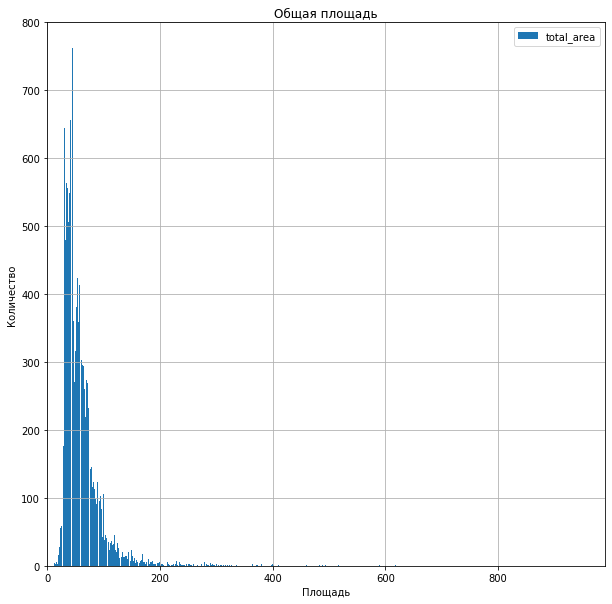

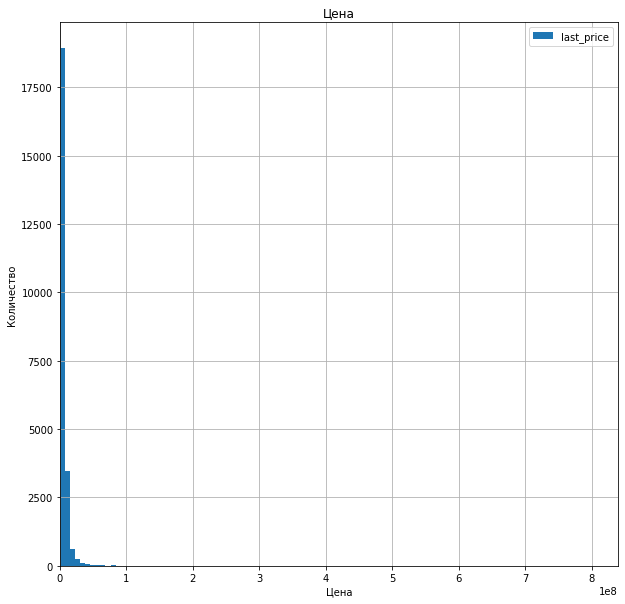

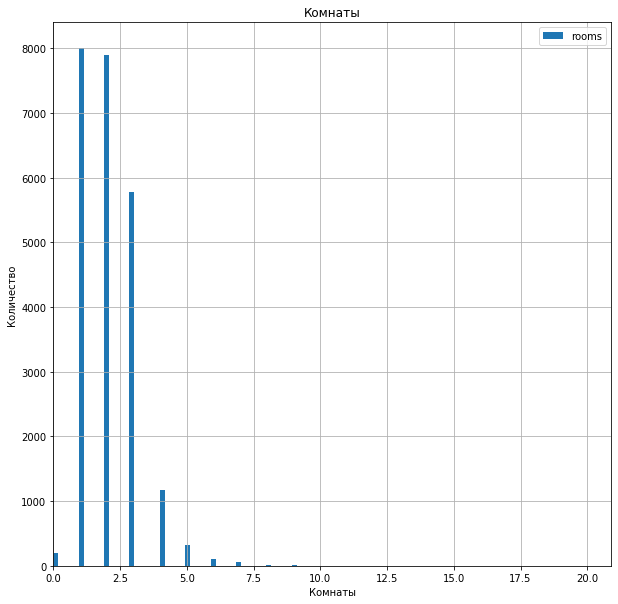

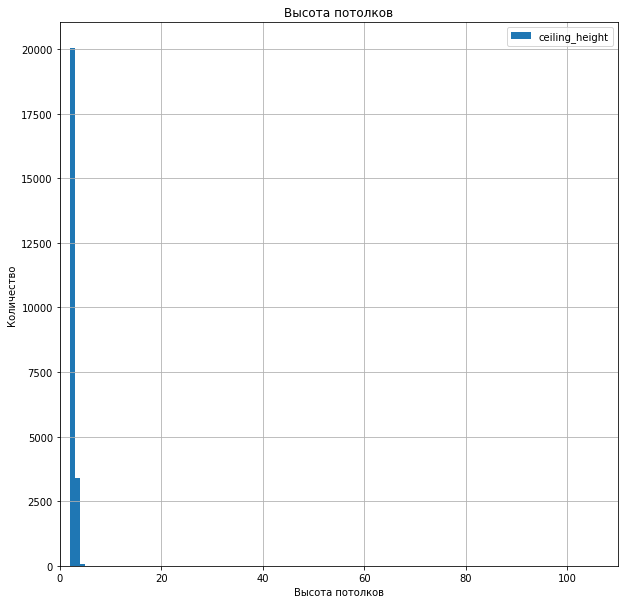

In [20]:
print(data.max())
import matplotlib.pyplot as plt
a1 = data['total_area'].plot(kind='hist', bins=1000, title='Общая площадь', figsize=(10,10),
                             xlim=(0,1.1*data['total_area'].max()), grid=True, legend=True)
a1.set_xlabel('Площадь')
a1.set_ylabel('Количество')
plt.show()
#data.hist('last_price', bins=100, range=(0,data['last_price'].max()))
a2 = data['last_price'].plot(kind='hist', bins=100, title='Цена', figsize=(10,10),
                             xlim=(0,1.1*data['last_price'].max()), grid=True, legend=True)
a2.set_xlabel('Цена')
a2.set_ylabel('Количество')
plt.show()
#data.hist('rooms', bins=100, range=(0,data['rooms'].max()))
a3 = data['rooms'].plot(kind='hist', bins=100, title='Комнаты', figsize=(10,10),
                             xlim=(0,1.1*data['rooms'].max()), grid=True, legend=True)
a3.set_xlabel('Комнаты')
a3.set_ylabel('Количество')
plt.show()
#data.hist('ceiling_height', bins=100, range=(0,data['ceiling_height'].max()))
a4 = data['ceiling_height'].plot(kind='hist', bins=100, title='Высота потолков', figsize=(10,10),
                             xlim=(0,1.1*data['ceiling_height'].max()), grid=True, legend=True)
a4.set_xlabel('Высота потолков')
a4.set_ylabel('Количество')
plt.show()

Иногда, конечно, попадаются царские хоромы, но в целом все обычно.

## Время продажи

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

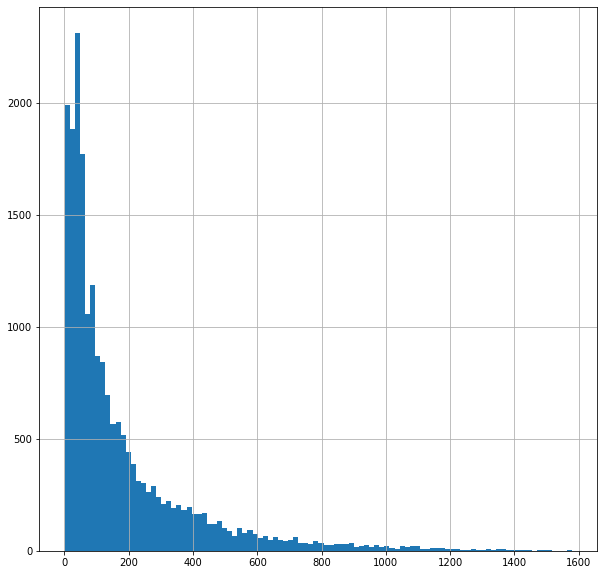

In [21]:
data['days_exposition'].hist(bins = 100, figsize=(10,10))
data['days_exposition'].describe()

Основная масса продается до 100 дней, затем начинается стремительный спад до 200 и плавный дальше. Хотя странно что так много квартир продано за считанные дни. Возможно это аналог пустым значениям и мы не можем быть уверены что квартира именно продана - объявление могли просто снять.

## Проверка на выбросы

In [22]:
data['index'] = data['index'].reset_index()
data.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,square_price,day,month,year,coef_area,coef_kitchen
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,11782.000000,9.878421,6.540058e+06,60.095226,2.070656,2.736022,10.675875,34.577414,5.878124,10.485418,0.593677,14192.656056,180.741395,9.985727e+04,2.567367,6.401570,2017.371016,0.567775,0.186852
std,6802.773883,5.681156,1.091093e+07,35.668758,1.078591,0.997929,6.594823,22.360449,4.871485,6.026880,0.960660,8613.348153,219.732782,5.050106e+04,1.788279,3.492948,1.037393,0.101329,0.070107
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,5891.000000,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,9238.000000,45.000000,7.692308e+04,1.000000,3.000000,2017.000000,0.503333,0.137363
50%,11782.000000,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,13096.500000,95.000000,9.545455e+04,3.000000,6.000000,2017.000000,0.568210,0.172363
75%,17673.000000,14.000000,6.790000e+06,69.000000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,16285.000000,231.000000,1.148649e+05,4.000000,10.000000,2018.000000,0.634783,0.225000
max,23564.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,65968.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.008333,0.787879


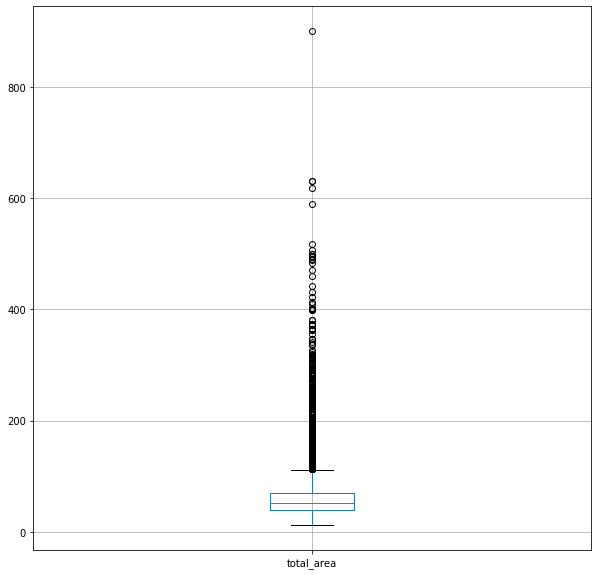

In [24]:
data.boxplot('total_area', figsize=(10,10))

Отбросить 1 квартиру на 900м2 - окей, парочку за 550+ тоже. Но ниже как-то жалко.

In [25]:
print(data.query('113 < total_area <= 550')['total_area'].count() / data['total_area'].count())
print(data.query('113 < total_area <= 200')['total_area'].count() / data['total_area'].count())
print(data.query('200 < total_area <= 550')['total_area'].count() / data['total_area'].count())

0.05351156375981328
0.044175684277530235
0.009335879482283047


Выше 200 и до тех редких всего 0,9%. Но если начинать с конца верхнего уса, то имеем уже 5%. Мое мнение, что их все же можно удалить, хотя все же хотелось бы получше узнать как правильно поступать глядя на боксплот. Хотя я бы отрезал на 330+.

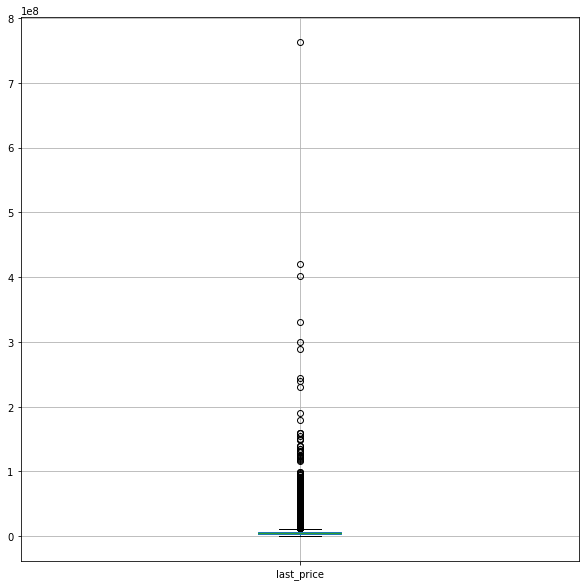

In [26]:
data.boxplot('last_price', figsize=(10,10))

In [27]:
print(data.query('last_price > 6.790000e+06')['last_price'].count() / data['last_price'].count())

0.24990451941438574


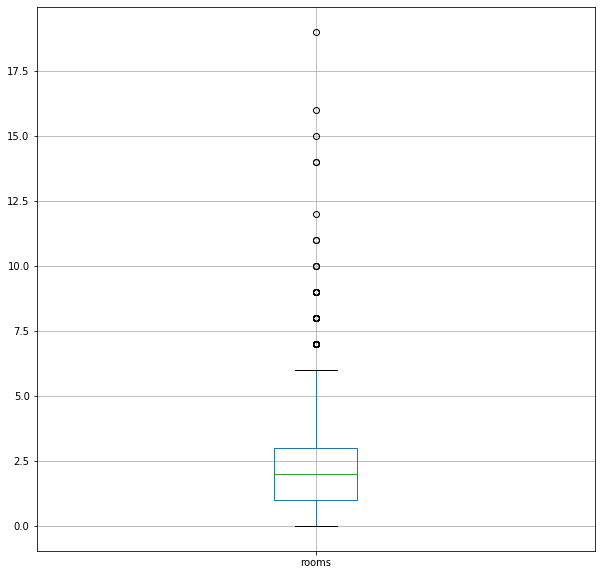

In [29]:
data.boxplot('rooms', figsize=(10,10))

In [30]:
print(data.query('rooms > 3')['rooms'].count() / data['rooms'].count())

0.07175896456609378


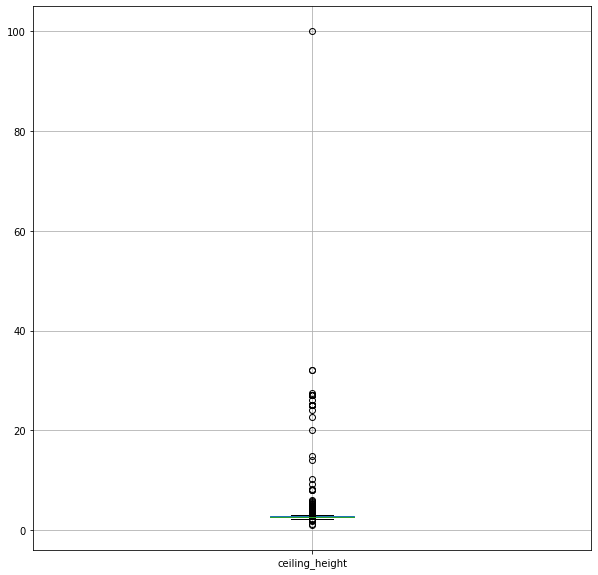

In [31]:
data.boxplot('ceiling_height', figsize=(10,10))

In [32]:
print(data.query('ceiling_height > 2.75')['ceiling_height'].count() / data['ceiling_height'].count())

0.23683428813918947


И снова много. Неужели можно просто так взять и выкинуть столько данных?

In [33]:
wh_area = (data['total_area'].quantile(0.75) - data['total_area'].quantile(0.25))*1.5
print(data['total_area'].quantile(0.25) - wh_area, data['total_area'].quantile(0.75) + wh_area)

wh_price = (data['last_price'].quantile(0.75) - data['last_price'].quantile(0.25))*1.5
print(data['last_price'].quantile(0.25) - wh_price, data['last_price'].quantile(0.75) + wh_price)

wh_rooms = (data['rooms'].quantile(0.75) - data['rooms'].quantile(0.25))*1.5
print(data['rooms'].quantile(0.25) - wh_rooms, data['rooms'].quantile(0.75) + wh_rooms)

wh_height = (data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25))*1.5
print(data['ceiling_height'].quantile(0.25) - wh_height, data['ceiling_height'].quantile(0.75) + wh_height)

-3.5 112.5
-1685000.0 11875000.0
-2.0 6.0
2.2499999999999996 3.0500000000000003


In [34]:
test = data.query('-3.5 <= total_area <= 112.5 & -1685000 <= last_price <= 11875000 & -2 <= rooms <= 6 & 2.25 <= ceiling_height <= 3.05')

In [35]:
def qua(x):
    wh = (x.quantile(0.75) - x.quantile(0.25))*1.5
    c1 = x.quantile(0.25) - wh
    c2 = x.quantile(0.75) + wh
    return c1, c2

print(qua(data['total_area']))
print(qua(data['last_price']))
print(qua(data['rooms']))
print(qua(data['ceiling_height']))

(-3.5, 112.5)
(-1685000.0, 11875000.0)
(-2.0, 6.0)
(2.2499999999999996, 3.0500000000000003)


## Факторы ценовой политики

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a4d0d15d0>,
      dtype=object)

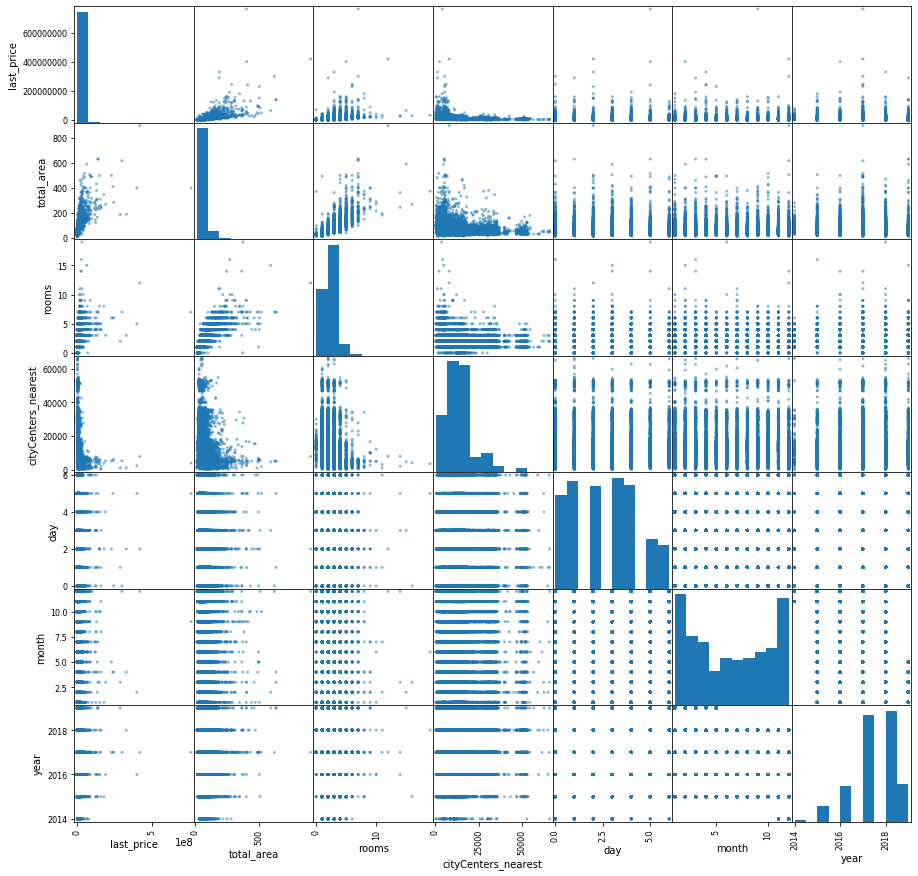

In [36]:
fact = data[['last_price','total_area','rooms','floors','cityCenters_nearest','day','month','year']]
pd.plotting.scatter_matrix(fact, figsize=(15, 15))
# а еще - как получить отсюда лишь 1 строку или 1 столбец?

Не считая редкие случаи, самые дорогие объявления в целом имеют площадь около 300м, 5 комнат, находятся до 10км от центра (или же в нем), выставленые по средам и субботам, в январе и апреле. Самые дорогие были в 2017-м году, самые дешевые в 2014-м.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a4bb44110>,
      dtype=object)

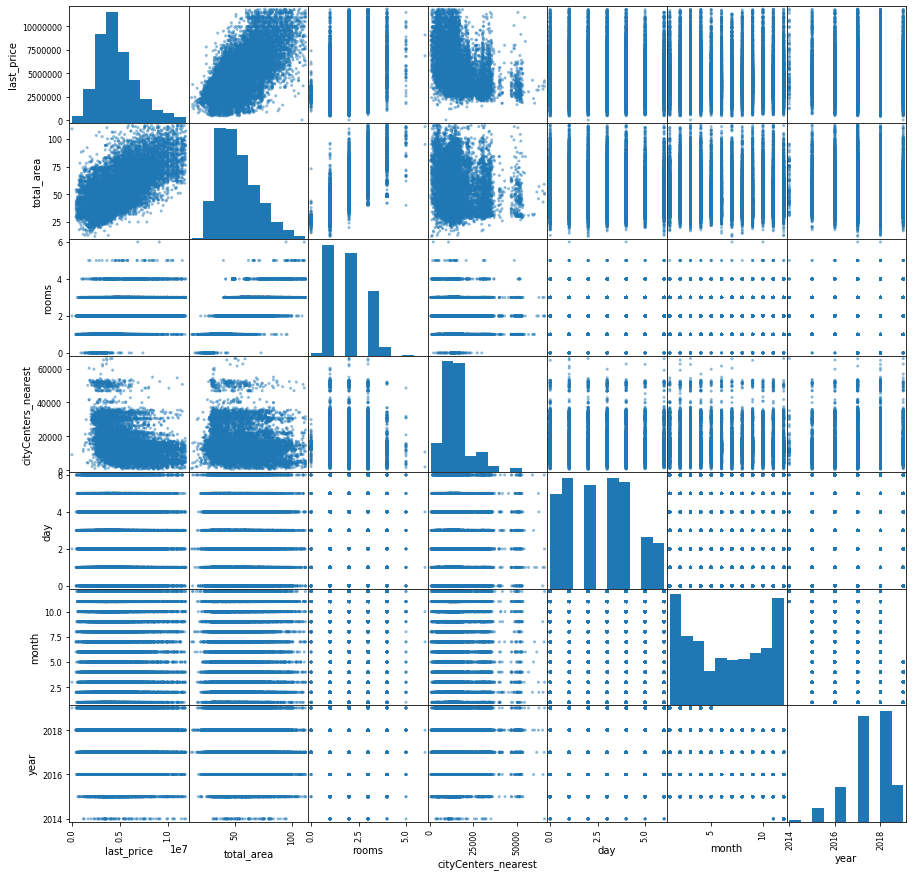

In [38]:
fact_test = test[['last_price','total_area','rooms','floors','cityCenters_nearest','day','month','year']]
pd.plotting.scatter_matrix(fact_test, figsize=(15, 15))

## Наибольше объявлений

In [40]:
local = data.pivot_table(index='locality_name', values='square_price', aggfunc=['count', 'mean'])
local.columns = ['counts', 'means']
local.sort_values('counts', ascending = False).head(10)

,counts,means
locality_name,,
Санкт-Петербург,15651,115366.131408
посёлок Мурино,520,86298.809315
посёлок Шушары,439,78943.474460
Всеволожск,398,68985.235455
Пушкин,369,103611.362825
Колпино,338,75735.589833
посёлок Парголово,327,90675.627757
Гатчина,307,69045.519030
деревня Кудрово,299,93002.173472


Наибольше объявлений в Питере, как ни странно. И самое дороже. Дешевее всего же в Выборге.

In [41]:
local_test = test.pivot_table(index='locality_name', values='square_price', aggfunc=['count', 'mean'])
local_test.columns = ['counts', 'means']
local_test.sort_values('counts', ascending = False).head(10)

,counts,means
locality_name,,
Санкт-Петербург,12796,105831.397236
посёлок Мурино,518,86273.867958
посёлок Шушары,435,78949.961163
Всеволожск,390,67488.079643
посёлок Парголово,326,90833.211024
Колпино,325,75577.890718
Пушкин,323,100691.084774
деревня Кудрово,298,92938.190948
Гатчина,298,68910.416556


## Расстояния от центра

In [44]:
center = data.query('locality_name == "Санкт-Петербург"')
center['center_km'] = center['cityCenters_nearest'] // 1000
center['center_km'].unique()
#data['center_km'] = data['center_km'].astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([16., 13.,  6.,  8., 11., 15., 14., 10., 12.,  9.,  2.,  3.,  4.,
       nan,  7.,  5., 21., 17.,  1., 24., 25., 23., 20.,  0., 22., 18.,
       27., 28., 19., 26., 29.])

Text(0, 0.5, 'Цена')

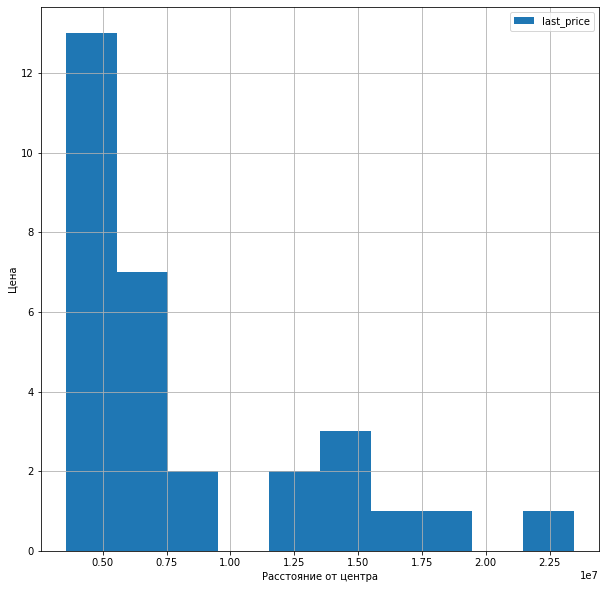

In [45]:
centrkm = center.pivot_table(index='center_km', values='last_price', aggfunc='mean').reset_index()
cent = centrkm.plot(x='center_km', y='last_price', grid=True, figsize=(10, 10), kind='hist')
cent.set_xlabel('Расстояние от центра')
cent.set_ylabel('Цена')

Можем предположить что центр заканчивается на 9 км.

Text(0, 0.5, 'Цена за м2')

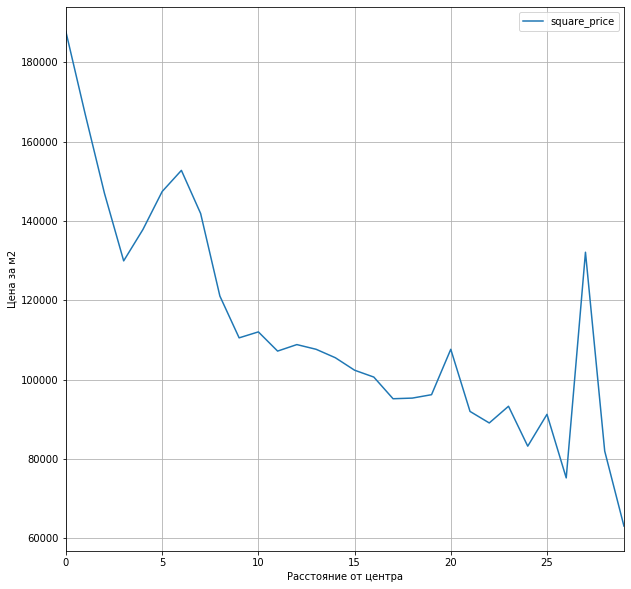

In [46]:
centrkm_2 = center.pivot_table(index='center_km', values='square_price', aggfunc='mean').reset_index()
cent_2 = centrkm_2.plot(x='center_km', y='square_price', grid=True, figsize=(10, 10))
cent_2.set_xlabel('Расстояние от центра')
cent_2.set_ylabel('Цена за м2')

In [47]:
center_test = test.query('locality_name == "Санкт-Петербург"')
center_test['center_km'] = center_test['cityCenters_nearest'] // 1000
center_test['center_km'].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([13.,  8., 11., 15., 14., 10.,  9.,  2., 12., 16.,  4., nan,  7.,
        6.,  5., 21., 17.,  3.,  1., 24., 25., 23., 22., 18., 20., 28.,
       19.,  0., 27., 29., 26.])

Text(0, 0.5, 'Цена за м2')

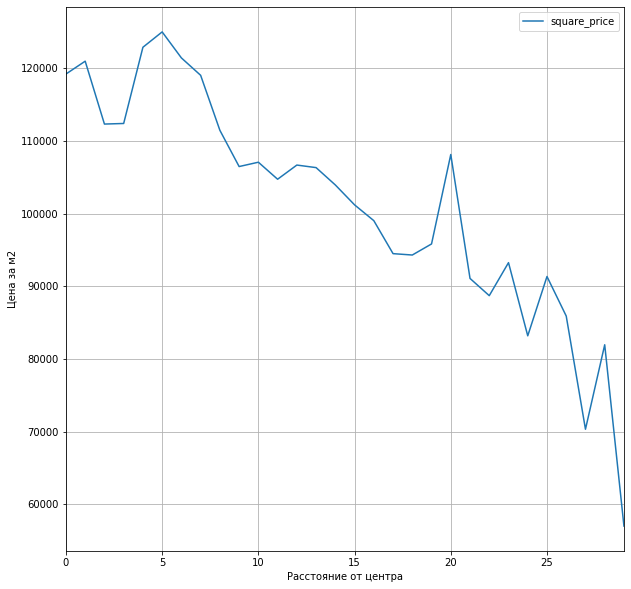

In [48]:
centrkm_test = center_test.pivot_table(index='center_km', values='square_price', aggfunc='mean').reset_index()
cent_test = centrkm_test.plot(x='center_km', y='square_price', grid=True, figsize=(10, 10))
cent_test.set_xlabel('Расстояние от центра')
cent_test.set_ylabel('Цена за м2')

In [49]:
centrkm_2.query('25 < center_km < 30').sort_values('square_price', ascending = False).reset_index().head(20)

,index,center_km,square_price
0,27,27.0,132115.709459
1,28,28.0,81944.200236
2,26,26.0,75171.911041
3,29,29.0,63011.855905


In [50]:
data.query('132115 < square_price < 132116 & cityCenters_nearest > 27000')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,locality_name,cityCenters_nearest,days_exposition,square_price,day,month,year,floors,coef_area,coef_kitchen


In [51]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)
data.query('27000 < cityCenters_nearest < 28000').sort_values('square_price')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,days_exposition,square_price,day,month,year,floors,coef_area,coef_kitchen
12566,12566,6,4000000,87,2018-08-09T00:00:00,3,3.50,3.0,42.000000,1,False,False,False,9.000000,0,посёлок Металлострой,27640.0,7.0,45977.011494,3,8,2018,first,0.482759,0.103448
9184,9184,18,5170000,94,2018-01-11T00:00:00,3,3.10,4.0,67.500000,4,False,False,False,9.700000,0,посёлок Металлострой,27794.0,171.0,55000.000000,3,1,2018,last,0.718085,0.103191
20945,20945,15,3450000,62,2018-01-01T00:00:00,2,2.75,18.0,33.000000,11,False,False,False,10.000000,2,посёлок Металлострой,27825.0,65.0,55645.161290,0,1,2018,other,0.532258,0.161290
12012,12012,13,3650000,64,2018-01-15T00:00:00,2,2.75,18.0,36.000000,10,False,False,False,10.000000,1,посёлок Металлострой,27825.0,225.0,57031.250000,0,1,2018,other,0.562500,0.156250
1179,1179,10,4800000,79,2018-10-15T00:00:00,3,2.70,17.0,44.888591,9,False,False,False,19.000000,0,посёлок Металлострой,27825.0,36.0,60759.493671,0,10,2018,other,0.568210,0.240506
9914,9914,6,2550000,41,2016-04-11T00:00:00,1,2.60,10.0,18.000000,3,False,False,False,11.000000,1,посёлок Шушары,27574.0,72.0,62195.121951,0,4,2016,other,0.439024,0.268293
10065,10065,0,4250000,67,2015-07-09T00:00:00,3,2.50,9.0,39.000000,5,False,False,False,8.400000,1,посёлок Металлострой,27102.0,694.0,63432.835821,3,7,2015,other,0.582090,0.125373
3171,3171,19,4700000,74,2017-11-27T00:00:00,4,2.50,9.0,48.800000,4,False,False,False,6.300000,1,посёлок Металлострой,27102.0,57.0,63513.513514,0,11,2017,other,0.659459,0.085135
20367,20367,10,3750000,59,2016-06-09T00:00:00,2,2.80,3.0,36.000000,2,False,False,False,7.000000,0,посёлок Александровская,27352.0,45.0,63559.322034,3,6,2016,other,0.610169,0.118644
16008,16008,12,4800000,75,2016-05-26T00:00:00,4,2.50,9.0,48.800000,8,False,False,False,6.500000,1,посёлок Металлострой,27102.0,234.0,64000.000000,3,5,2016,other,0.650667,0.086667


Прикольно) 3-4 комнаты, 100-400 квадратов, 10+ лимонов. Либо кто-то очень смелый шутник, либо это конкретные опечатки.

## Квартиры в центре

In [52]:
ct = center.query('center_km <= 9') 
# где-то я напортачил с индексами
# я понял что происходит с индексами, из-за присвоения другой переменной я старые как поле в таблице.
# надо прилумать как аккуратнее это убрать, не удалять же столбец какждый раз.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a438182d0>]],
      dtype=object)

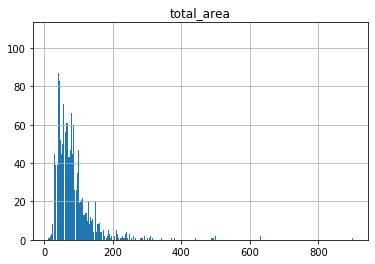

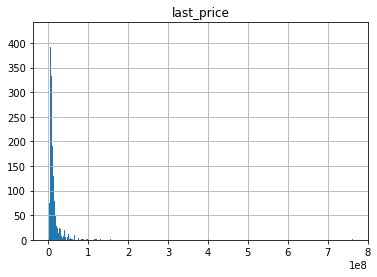

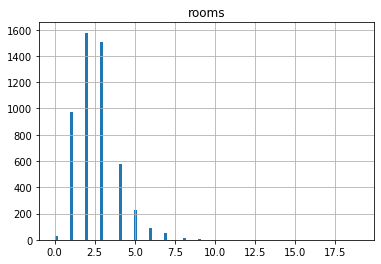

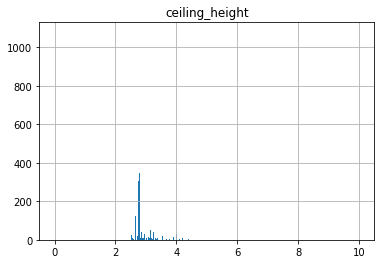

In [53]:
ct.hist('total_area', bins = 1000)
ct.hist('last_price', bins = 1000)
ct.hist('rooms', bins = 100)
ct.hist('ceiling_height', bins = 1000, range = (0, 10))

In [54]:
ct_test = center_test.query('center_km <= 9')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a43fef450>]],
      dtype=object)

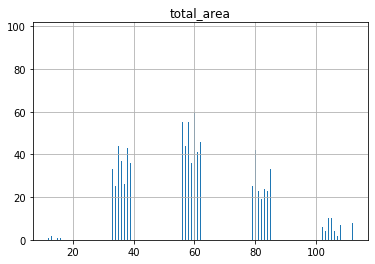

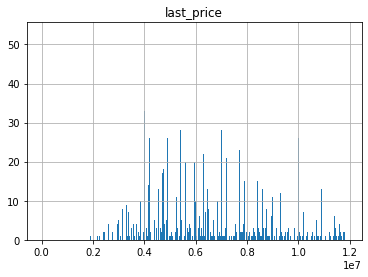

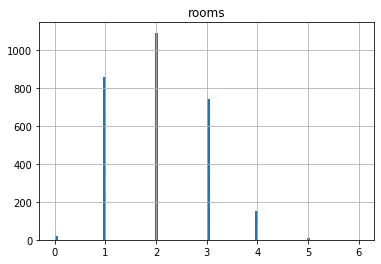

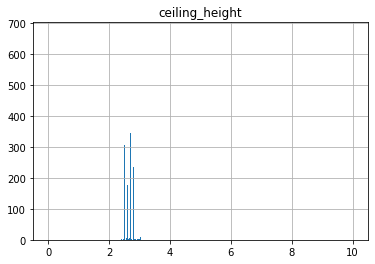

In [55]:
ct_test.hist('total_area', bins = 1000)
ct_test.hist('last_price', bins = 1000)
ct_test.hist('rooms', bins = 100)
ct_test.hist('ceiling_height', bins = 1000, range = (0, 10))

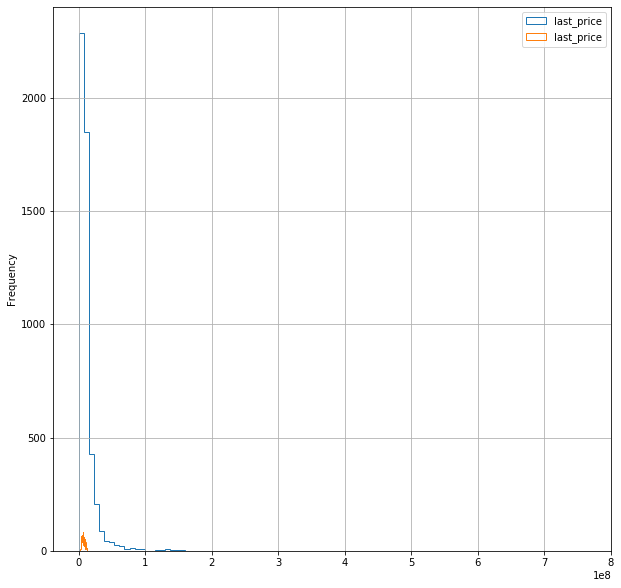

In [56]:
ax = ct.plot(y='last_price', kind='hist', histtype='step', bins=100, figsize=(10,10))
ct_test.plot(y='last_price', kind='hist', histtype='step', bins=100, figsize=(10,10), grid=True, ax=ax)

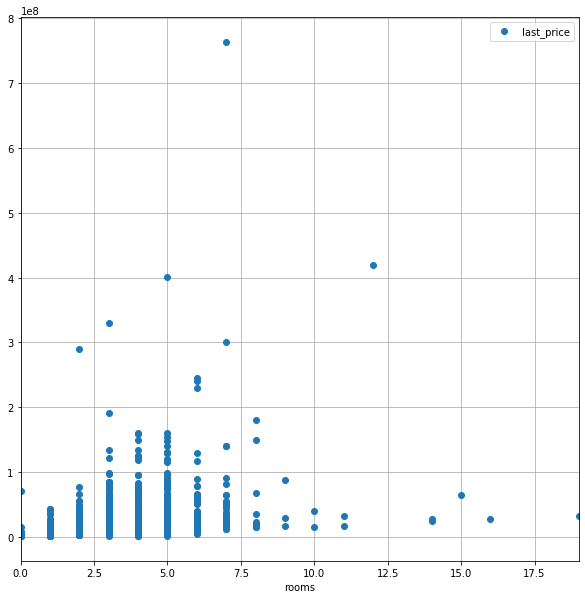

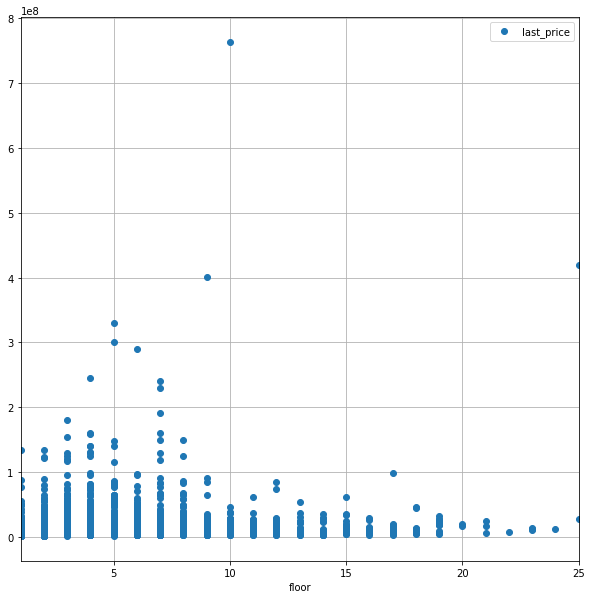

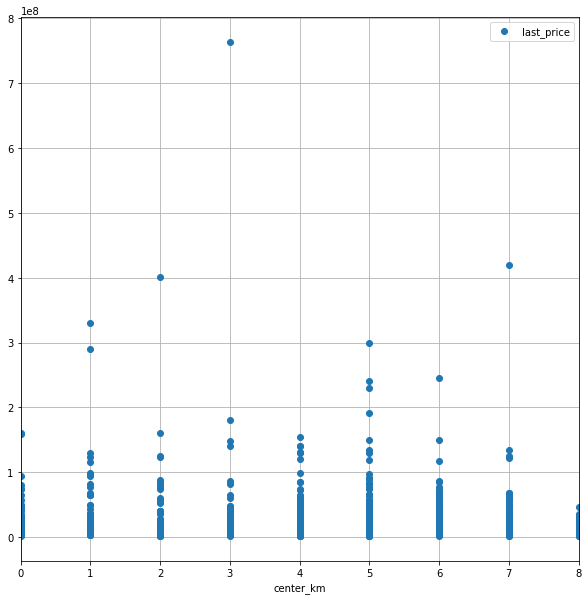

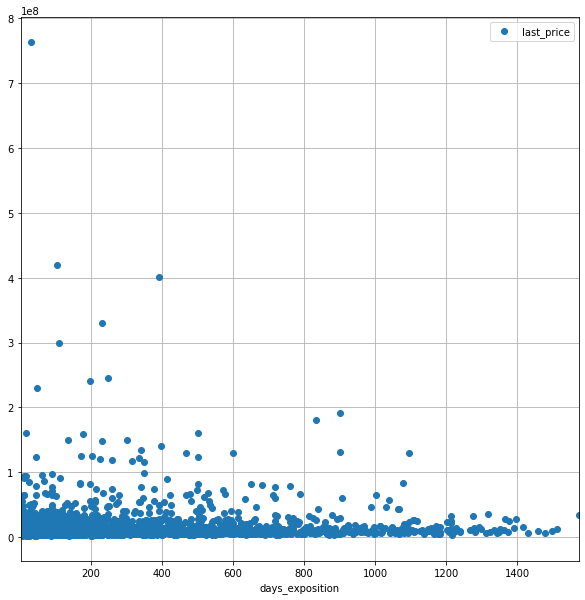

In [57]:
center.query('center_km < 9').plot(x='rooms', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()
center.query('center_km < 9').plot(x='floor', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()
center.query('center_km < 9').plot(x='center_km', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()
center.query('center_km < 9').plot(x='days_exposition', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()

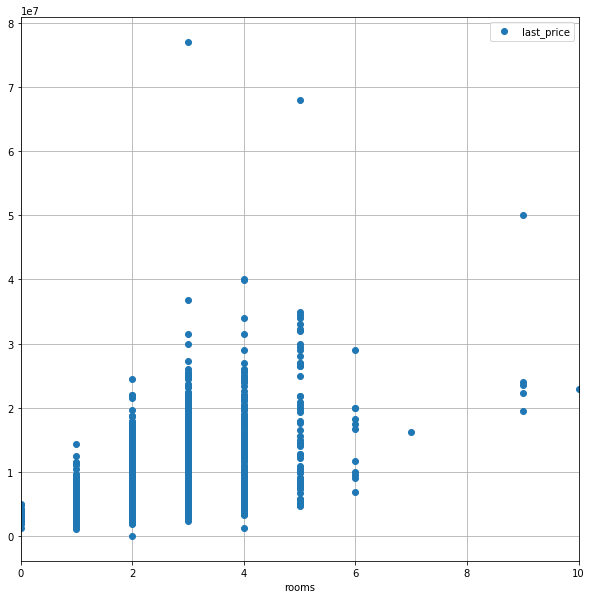

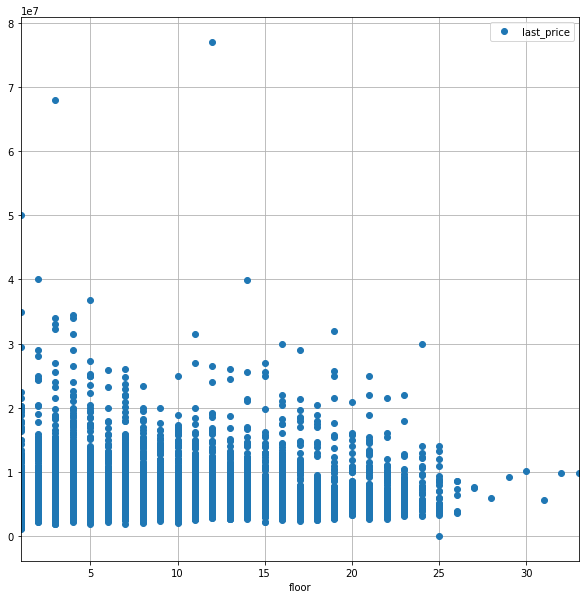

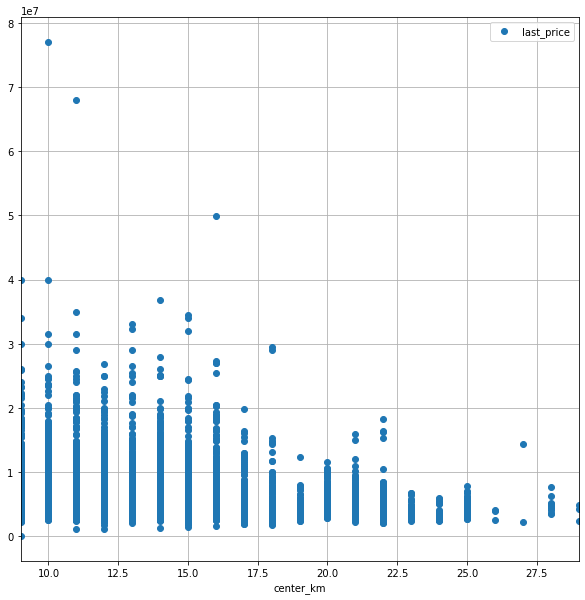

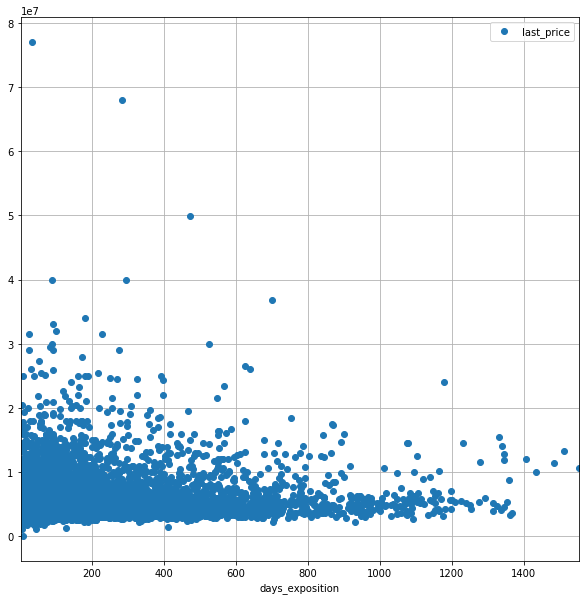

In [58]:
center.query('center_km >= 9').plot(x='rooms', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()
center.query('center_km >= 9').plot(x='floor', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()
center.query('center_km >= 9').plot(x='center_km', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()
center.query('center_km >= 9').plot(x='days_exposition', y='last_price', grid=True, figsize=(10, 10), style='o')
plt.show()

Не вижу смысла сравнивать конкретно центр и весь город, мне кажется лучше сопоставить внутренний и внешний круг. Даже с такими графиками многое видно. Цены в центре до 1000 дней выше в 2-4 раза. По этажам выглядит

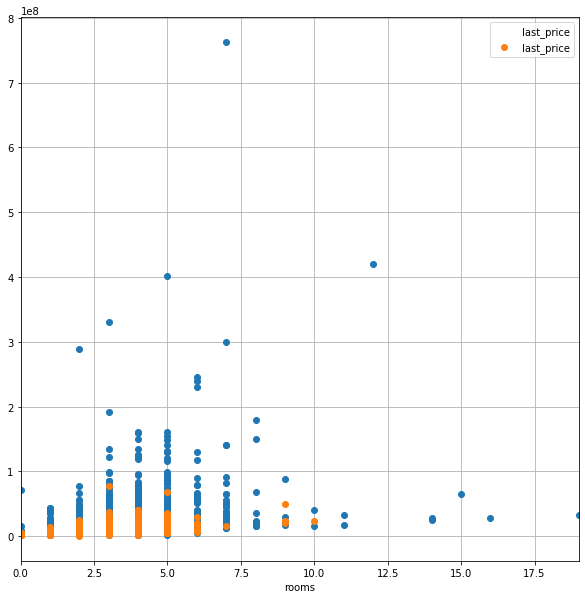

In [59]:
rooms = center.query('center_km < 9').plot(x='rooms', y='last_price', grid=True, figsize=(10, 10), style='o')

center.query('center_km >= 9').plot(x='rooms', y='last_price', grid=True, figsize=(10, 10), style='o', ax=rooms)
plt.show()

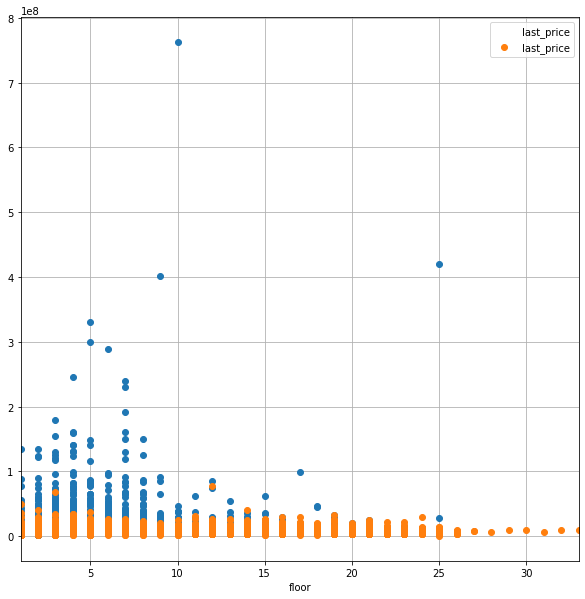

In [60]:
floor = center.query('center_km < 9').plot(x='floor', y='last_price', grid=True, figsize=(10, 10), style='o')

center.query('center_km >= 9').plot(x='floor', y='last_price', grid=True, figsize=(10, 10), style='o', ax=floor)
plt.show()

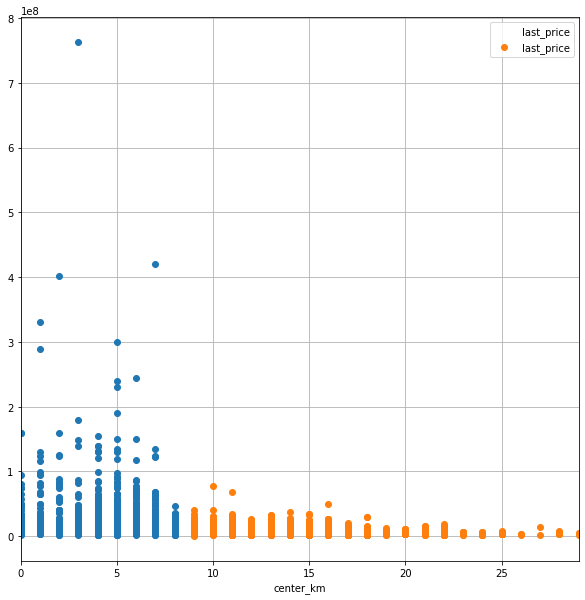

In [61]:
km = center.query('center_km < 9').plot(x='center_km', y='last_price', grid=True, figsize=(10, 10), style='o')

center.query('center_km >= 9').plot(x='center_km', y='last_price', grid=True, figsize=(10, 10), style='o', ax=km)
plt.show()

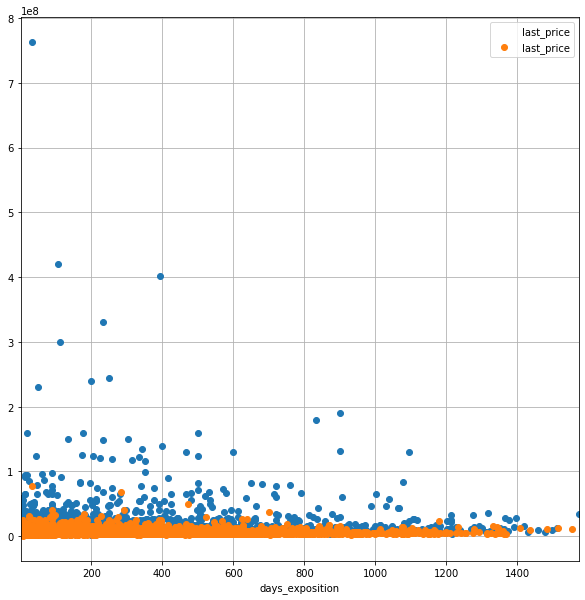

In [62]:
days = center.query('center_km < 9').plot(x='days_exposition', y='last_price', grid=True, figsize=(10, 10), style='o')

center.query('center_km >= 9').plot(x='days_exposition', y='last_price', grid=True, figsize=(10, 10), style='o', ax=days)
plt.show()

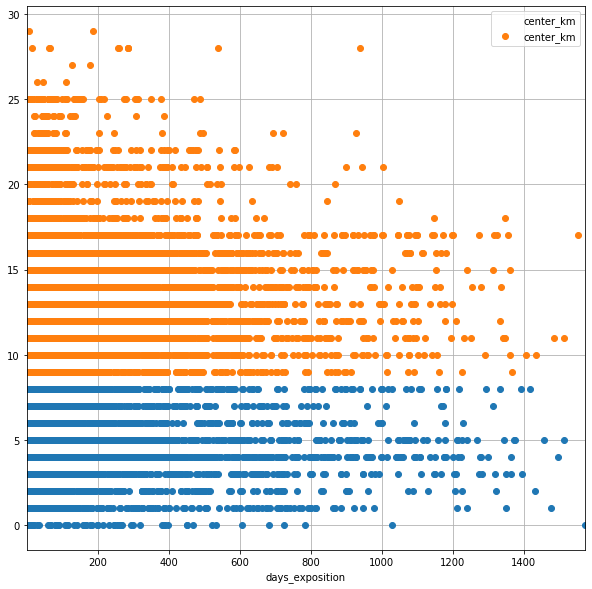

In [63]:
days_km = center.query('center_km < 9').plot(x='days_exposition', y='center_km', grid=True, figsize=(10, 10), style='o')

center.query('center_km >= 9').plot(x='days_exposition', y='center_km', grid=True, figsize=(10, 10), style='o', ax=days_km)
plt.show()

# Вывод

Анализируя полученные данные можем сделать вывод что сервису следует сосредоточиться на объектах в самом центре города, а также на дорогих и больших за пределами Санкт-Петербурга, так как именно эти квартиры продаются наиболее быстро.